In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import skewnorm
from scipy.stats import linregress
import datetime
import string
import cartopy
import tools
import cartopy.crs as ccrs
import pandas as pd
pd.set_option("mode.chained_assignment", None)

dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))
statistics = pickle.load(open('../pickles/statistics.p','rb'))

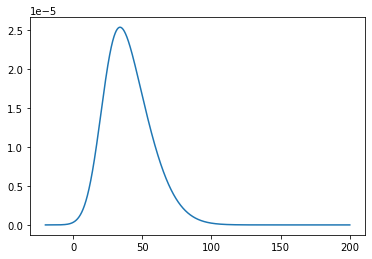

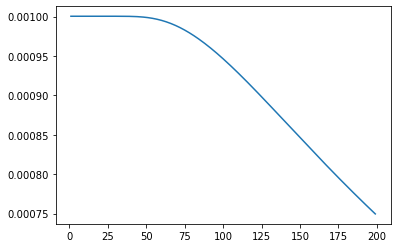

In [2]:
bw = 0.001

bin_edges = np.arange(-20,200,bw)

less_than_zeros = []

means = np.arange(1,200)

for mean in means:

    bc, ft = tools.depth_distribution_from_depth(mean,bin_edges,statistics=statistics['all'])

    less_than_zeros.append(np.sum(ft[bc<0]))
    
    if mean == 40:
    
        plt.plot(bc,ft)
        plt.show()
    
plt.plot(means,less_than_zeros)

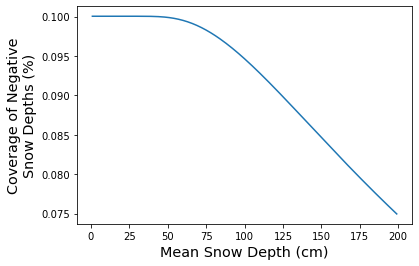

In [3]:
fig, ax = plt.subplots(1,1)
ax.plot(means,np.array(less_than_zeros)*100)
ax.set_ylabel('Coverage of Negative\nSnow Depths (%)', fontsize='x-large')
ax.set_xlabel('Mean Snow Depth (cm)', fontsize='x-large')

plt.savefig('../figures/fig_S4.png', bbox_inches='tight',dpi=500)
plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/sub-km-snow-depth-dist/sup_figs/figS4.png', bbox_inches='tight',dpi=500)

plt.show()

# Now do same for log-normal

## We find that the fraction of negative snow depths is ~100x lower for lognormal

In [4]:
statistics['all']

{'a': 2.542562886886376,
 'loc': -1.114525560819975,
 'scale': 1.4973819434202296,
 'CV': 0.41696167189340216,
 'n': 33539}

In [5]:
ln_fit_nums = (0.17010186101693794, -5.816583784086433, 5.732914591906359)
ln_statistics = {'a': ln_fit_nums[0],
                 'loc': ln_fit_nums[1],
                 'scale': ln_fit_nums[2],
                 'CV': 0.41696167189340216,
                 'n': 33539}

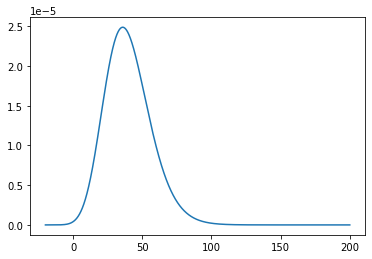

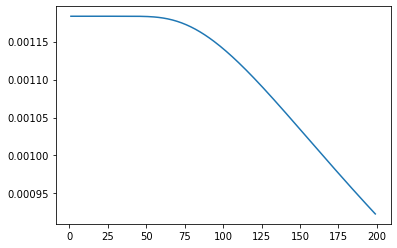

In [7]:


bw = 0.001

bin_edges = np.arange(-20,200,bw)

less_than_zeros = []

means = np.arange(1,200)

for mean in means:

    bc, ft = tools.depth_distribution_from_depth_ln(mean,bin_edges,statistics=ln_statistics)

    less_than_zeros.append(np.sum(ft[bc<0]))
    
    if mean == 40:
    
        plt.plot(bc,ft)
        plt.show()
    
plt.plot(means,less_than_zeros)